In [40]:
import requests
import json
import folium

# use data on opensteetmap
overpass_url = "http://overpass-api.de/api/interpreter"

In [ ]:
# ! pip install folium

In [41]:
# hospitals 
overpass_query = """
[out:json];
area["ISO3166-2"="US-CA"];
(node["amenity"="hospital"](area);
 way["amenity"="hospital"](area);
 rel["amenity"="hospital"](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data_hospital = response.json()

# map hospitals
m_h = folium.Map(location=[37.6, -120.9], zoom_start=6)
# Loop through the data and add each data point to the map
for element in data_hospital['elements']:
    if element['type'] == 'node':
        lat = element['lat']
        lon = element['lon']
        name = element['tags']['name'] if 'name' in element['tags'] else 'No Name'
        folium.Marker(location=[lat, lon], 
                      popup=name,
                      icon=folium.Icon(color="green", icon="ok-sign"),
                     ).add_to(m_h)
# Show the map
m_h


In [42]:
# high school, college, university
overpass_query = """
[out:json];
area["ISO3166-2"="US-CA"];
(
  node["amenity"="school"]["name"~"High School"](area);
  way["amenity"="school"]["name"~"High School"](area);
  rel["amenity"="school"]["name"~"High School"](area);
  
  node["amenity"="college"](area);
  way["amenity"="college"](area);
  rel["amenity"="college"](area);

  node["amenity"="university"](area);
  way["amenity"="university"](area);
  rel["amenity"="university"](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data_school = response.json()

# map schools
m_s = folium.Map(location=[37.6, -120.9], zoom_start=6)
# Loop through the data and add each data point to the map
for element in data_school['elements']:
    if element['type'] == 'node':
        lat = element['lat']
        lon = element['lon']
        name = element['tags']['name'] if 'name' in element['tags'] else 'No Name'
        folium.Marker(location=[lat, lon], 
                      popup=name,
                      icon=folium.Icon(color="green", icon="ok-sign"),
                     ).add_to(m_s)
# Show the map
m_s


In [43]:
# malls
overpass_query = """
[out:json];
area["ISO3166-2"="US-CA"];
(
  node["shop"="mall"](area);
  way["shop"="mall"](area);
  rel["shop"="mall"](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data_mall = response.json()

# map malls
m_m = folium.Map(location=[37.6, -120.9], zoom_start=6)
# Loop through the data and add each data point to the map
for element in data_mall['elements']:
    if element['type'] == 'node':
        lat = element['lat']
        lon = element['lon']
        name = element['tags']['name'] if 'name' in element['tags'] else 'No Name'
        folium.Marker(location=[lat, lon], 
                      popup=name,
                      icon=folium.Icon(color="green", icon="ok-sign"),
                     ).add_to(m_m)
# Show the map
m_m


In [96]:
# fitting_room
overpass_query = """
[out:json];
area["ISO3166-2"="US-CA"];
(node["shop"="clothes"](area);
 way["shop"="clothes"](area);
 rel["shop"="clothes"](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data_fitting = response.json()

# map fitting room
m_f = folium.Map(location=[37.6, -120.9], zoom_start=6)
# Loop through the data and add each data point to the map
for element in data_fitting['elements']:
    if element['type'] == 'node':
        lat = element['lat']
        lon = element['lon']
        name = element['tags']['name'] if 'name' in element['tags'] else 'No Name'
        folium.Marker(location=[lat, lon], 
                      popup=name,
                      icon=folium.Icon(color="green", icon="ok-sign"),
                     ).add_to(m_f)
# Show the map
m_f


In [45]:
# Create a map for all
m = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Function to add data to the map
def add_data_to_map(data, color, icon):
    for element in data['elements']:
        if element['type'] == 'node':
            lat = element['lat']
            lon = element['lon']
            folium.Marker([lat, lon], icon=folium.Icon(color=color, icon=icon)).add_to(m)

# Add schools, hospitals, malls, fitting rooms to the map
add_data_to_map(data_school, 'blue', 'graduation-cap') 
add_data_to_map(data_hospital, 'red', 'plus') 
add_data_to_map(data_mall, 'green', 'shopping-cart')  
add_data_to_map(data_fitting, 'purple', 'asterisk') 

# Display the map
m

In [50]:
# ! pip install scipy

In [83]:
import numpy as np

# 函数来从JSON响应中提取坐标数据
def extract_coordinates(json_data):
    elements = json_data['elements']
    coordinates = np.array([[element['lat'], element['lon']] for element in elements])
    return coordinates

# 将数据保存为.npy文件的函数
def save_data(data, filename):
    np.save(filename, data)

hospital_coordinates = extract_coordinates(data_hospital)
save_data(hospital_coordinates, "data_hospital.npy")

school_coordinates = extract_coordinates(data_school)
save_data(school_coordinates, "data_school.npy")

mall_coordinates = extract_coordinates(data_mall)
save_data(mall_coordinates, "data_mall.npy")

fitting_coordinates = extract_coordinates(data_fitting)
save_data(fitting_coordinates, "data_fitting.npy")

data_school_1 = np.load("data_school.npy")
data_hospital_1 = np.load("data_hospital.npy")
data_mall_1 = np.load("data_mall.npy")
data_fitting_1 = np.load("data_fitting.npy")

# 合并数据集
data_combined = np.concatenate([data_school_1, data_hospital_1, data_mall_1, data_fitting_1], axis=0)

# 保存组合的数据备用
save_data(data_combined, "data_combined.npy")


In [84]:
# Display Ripley’s K Curve
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

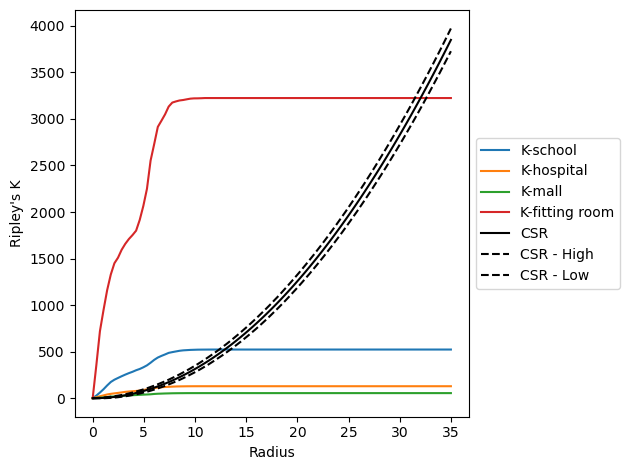

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Function to calculate Ripley's K
def ripley_k(data, r):
    n = len(data)
    k = np.zeros(len(r))
    for i in range(n):
        for j, radius in enumerate(r):
            in_circle = np.linalg.norm(data[i] - data, axis=1) <= radius
            k[j] += np.sum(in_circle)
    return k / n

# Radius values
r = np.linspace(0, 35, 100)

# Calculate Ripley's K for different datasets
k_school = ripley_k(data_school_1, r)
k_hospital = ripley_k(data_hospital_1, r)
k_mall = ripley_k(data_mall_1, r)
k_fitting = ripley_k(data_fitting_1, r)

# Calculate K function for CSR process
k_csr = np.pi * r**2

# Calculate high and low boundaries for 95% confidence interval
upper_bound = poisson.ppf(0.975, mu=k_csr)
lower_bound = poisson.ppf(0.025, mu=k_csr)

# Plotting
plt.plot(r, k_school, label='K-school')
plt.plot(r, k_hospital, label='K-hospital')
plt.plot(r, k_mall, label='K-mall')
plt.plot(r, k_fitting, label='K-fitting room')
plt.plot(r, k_csr, label='CSR', color='black')
plt.plot(r, upper_bound, label='CSR - High', linestyle='dashed', color='black')
plt.plot(r, lower_bound, label='CSR - Low', linestyle='dashed', color='black')
plt.xlabel("Radius")
plt.ylabel("Ripley's K")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # Move legend to the side
plt.tight_layout() # Adjust layout to fit legend
plt.show()

## 总结
#### 下载数据

首先，从openstreetmap api的公共数据中摘取了学校(school)，商场(mall)，医院(hospital), 试衣间(fitting room) 的位置数据，用json的格式保存了下来。学校只选取了高中以及大学(high schools, colleges, university)。因为没有找到直接的试衣间位置数据选取了衣服店。

#### 地图visualization

接着， 使用folium.Map function分别在地图上展示了它们的位置。密度最高的是衣服店，其次是学校，医院，和商场。它们大都只在人口密度较高的城市中大量出现。然后我在一张地图上把他们全部展示了出来，用不同的颜色区分。

#### 使用ripley's k function

首先提取所有位置的坐标信息，并整合。然后计算当前点与所有其他点之间的欧几里得距离，并检查哪些点位于当前半径内，并储存。最后在图上把它展示出来。  
从图中我们可以发现衣帽间在30英里内观察到的点之间的距离比完全随机过程预期的要近。这可能表明观察到的点过程有聚集倾向。这些点可能倾向于彼此靠近。衣帽间的K曲线在给定的半径范围内高于其他曲线，这可能表明衣帽间在该地区有更强的聚集倾向。  
该图显示，方圆约10公里内的学校数量比预期要多。这可能是因为学校往往位于人口稠密地区，而加州方圆10公里内有多个人口稠密地区。加利福尼亚州一些人口最稠密的地区包括：洛杉矶，旧金山，圣地亚哥，萨克拉门托，奥克兰。这些地区都是大量学校的所在地，Ripley 的 K 函数表明，这些地区的学校聚集程度比学校随机分布时的预期要多。这些地区学校的聚集可以由多种因素来解释，包括土地的可用性、土地成本和对学校的需求。土地在加州是一种稀缺资源，在人口稠密的地区尤其稀缺。这意味着学校通常建在这些地区较小的土地上，这可能会导致聚集。人口稠密地区的土地成本也较高，这使得在这些地区建造学校的成本更高。这也可能导致聚集，因为学校可能建在土地较便宜的地区。人口稠密地区对学校的需求也更高，因为这些地区有更多的儿童。这也可能导致聚集，因为学校可能建在学校需求量大的地区。  